# EDA Skincare Products

https://www.kaggle.com/datasets/eward96/skincare-products-clean-dataset/data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

In [2]:
path = "D:/Documents-D/datasets/dermis"
df = pd.read_csv(f"{path}/skincare_products_clean.csv")
print(len(df))
df.head()

1138


,product_name,product_url,product_type,clean_ingreds,price
0,The Ordinary Natural Moisturising Factors + HA...,https://www.lookfantastic.com/the-ordinary-nat...,Moisturiser,"['capric triglyceride', 'cetyl alcohol', 'prop...",£5.20
1,CeraVe Facial Moisturising Lotion SPF 25 52ml,https://www.lookfantastic.com/cerave-facial-mo...,Moisturiser,"['homosalate', 'glycerin', 'octocrylene', 'eth...",£13.00
2,The Ordinary Hyaluronic Acid 2% + B5 Hydration...,https://www.lookfantastic.com/the-ordinary-hya...,Moisturiser,"['sodium hyaluronate', 'sodium hyaluronate', '...",£6.20
3,AMELIORATE Transforming Body Lotion 200ml,https://www.lookfantastic.com/ameliorate-trans...,Moisturiser,"['ammonium lactate', 'c12-15', 'glycerin', 'pr...",£22.50
4,CeraVe Moisturising Cream 454g,https://www.lookfantastic.com/cerave-moisturis...,Moisturiser,"['glycerin', 'cetearyl alcohol', 'capric trigl...",£16.00


In [3]:
# convertir string a lista
df.clean_ingreds = df.clean_ingreds.str.strip("[]").str.split(",")
df.clean_ingreds = df.clean_ingreds.apply(lambda x: [i.strip().strip("'") for i in x])
df.head()

,product_name,product_url,product_type,clean_ingreds,price
0,The Ordinary Natural Moisturising Factors + HA...,https://www.lookfantastic.com/the-ordinary-nat...,Moisturiser,"[capric triglyceride, cetyl alcohol, propanedi...",£5.20
1,CeraVe Facial Moisturising Lotion SPF 25 52ml,https://www.lookfantastic.com/cerave-facial-mo...,Moisturiser,"[homosalate, glycerin, octocrylene, ethylhexyl...",£13.00
2,The Ordinary Hyaluronic Acid 2% + B5 Hydration...,https://www.lookfantastic.com/the-ordinary-hya...,Moisturiser,"[sodium hyaluronate, sodium hyaluronate, panth...",£6.20
3,AMELIORATE Transforming Body Lotion 200ml,https://www.lookfantastic.com/ameliorate-trans...,Moisturiser,"[ammonium lactate, c12-15, glycerin, prunus am...",£22.50
4,CeraVe Moisturising Cream 454g,https://www.lookfantastic.com/cerave-moisturis...,Moisturiser,"[glycerin, cetearyl alcohol, capric triglyceri...",£16.00


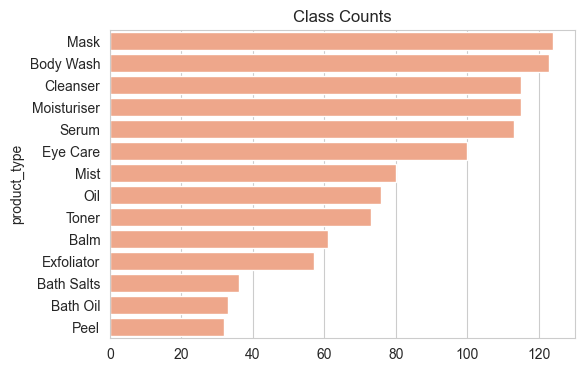

In [4]:
# cantidad de productos según clase (moisturiser, exfoliator, etc.)
class_counts = df.product_type.value_counts()
plt.figure(figsize=(6, 4))
sns.set_style("whitegrid")
sns.barplot(y=class_counts.index, x=class_counts.values, color="lightsalmon")
plt.title("Class Counts")
plt.show()

In [5]:
# todos los ingredientes
unique_ingredients = set()
for ingredients_list in df['clean_ingreds']:
    unique_ingredients.update(ingredients_list)

num_unique_ingredients = len(unique_ingredients)
num_unique_ingredients

2581

In [6]:
product_types = df.product_type.unique()
product_types

array(['Moisturiser', 'Serum', 'Oil', 'Mist', 'Balm', 'Mask', 'Peel',
       'Eye Care', 'Cleanser', 'Toner', 'Exfoliator', 'Bath Salts',
       'Body Wash', 'Bath Oil'], dtype=object)

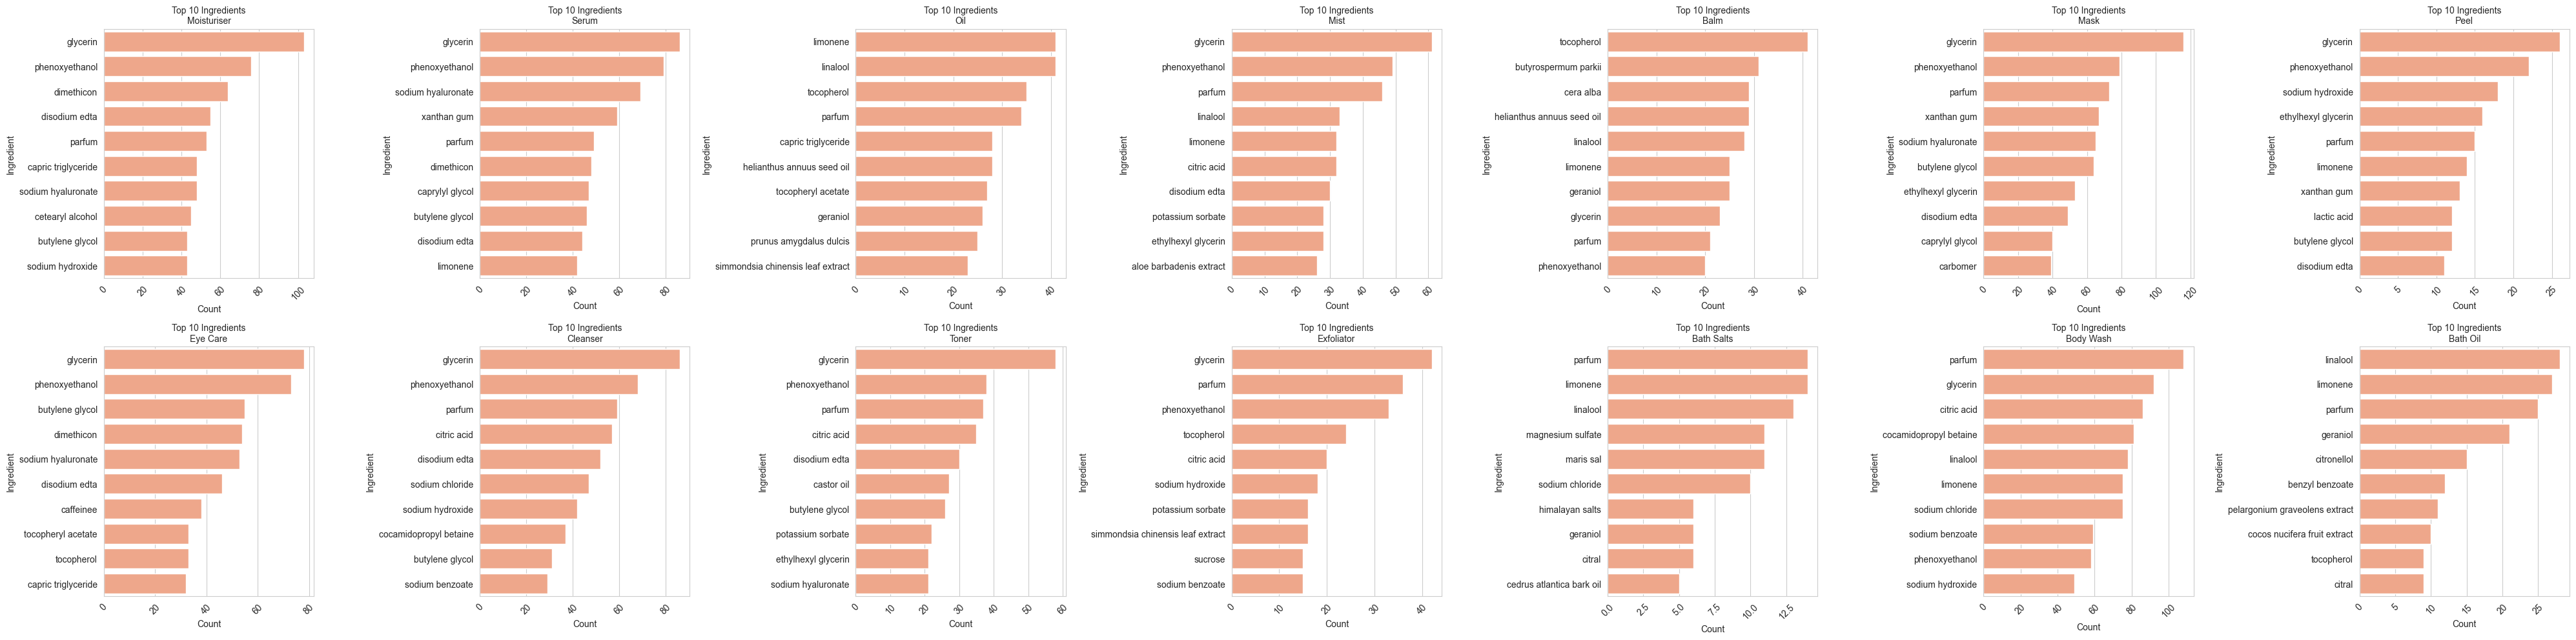

In [7]:
# ingredientes según tipo de producto
topk = 10
fig, axes = plt.subplots(2, 7, figsize=(40, 10)) # 2 x 7
axes = axes.flatten()
for i, product_type in enumerate(product_types):
    product_type_ingredients = df[df.product_type == product_type].clean_ingreds.explode().str.strip()
    ingredient_counts = Counter(product_type_ingredients)
    ingredient_counts_df = pd.DataFrame(ingredient_counts.items(), columns=['Ingredient', 'Count']).sort_values(by='Count', ascending=False)
    
    sns.barplot(x='Count', y='Ingredient', data=ingredient_counts_df.head(topk), ax=axes[i], color="lightsalmon")
    axes[i].set_title(f"Top {topk} Ingredients\n{product_type}", fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
# abrir la imagen aparte para ver

In [8]:
df['ingredients_str'] = df['clean_ingreds'].apply(lambda x: ' '.join(x))

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['ingredients_str'])

le = LabelEncoder()
y = le.fit_transform(df['product_type']) 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# ¿Se puede predecir la categoría (moisturizer, cleanser, etc.) en base a los ingredientes? Usando un random forest
clf = RandomForestClassifier(max_depth=20, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.5701754385964912
              precision    recall  f1-score   support

           0       0.70      0.47      0.56        15
           1       0.75      0.43      0.55         7
           2       0.67      0.67      0.67         6
           3       0.60      1.00      0.75        18
           4       0.74      0.52      0.61        27
           5       1.00      0.36      0.53        11
           6       0.29      0.50      0.36        12
           7       0.78      0.64      0.71        28
           8       0.67      0.32      0.43        19
           9       0.56      0.68      0.61        28
          10       0.67      0.84      0.74        19
          11       1.00      0.20      0.33         5
          12       0.22      0.32      0.26        19
          13       0.50      0.57      0.53        14

    accuracy                           0.57       228
   macro avg       0.65      0.54      0.55       228
weighted avg       0.63      0.57      0.57       2